# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Import the necessary libraries

In [4]:
import pandas as pd

### Question 1

#### Read the dataset

In [3]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv'

#### Display the top 5 rows in the data

In [9]:
import pandas as pd
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv'
df = pd.read_csv(path)
# now displaying the first five rows
df.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


#### Show the information of the dataset

In [10]:
# displaying information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3830 non-null   object 
 3   Country_Region       4005 non-null   object 
 4   Last_Update          4005 non-null   object 
 5   Lat                  3917 non-null   float64
 6   Long_                3917 non-null   float64
 7   Confirmed            4005 non-null   int64  
 8   Deaths               4005 non-null   int64  
 9   Recovered            4005 non-null   int64  
 10  Active               4005 non-null   int64  
 11  Combined_Key         4005 non-null   object 
 12  Incident_Rate        3916 non-null   float64
 13  Case_Fatality_Ratio  3957 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.2+ KB


#### Show the sum of missing values of features in the dataset

In [35]:
df.isna().sum()

FIPS                   740
Admin2                 735
Province_State         175
Country_Region           0
Last_Update              0
Lat                     88
Long_                   88
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [26]:
# confirmed cases by each country region
df.groupby('Country_Region').Confirmed.sum()

Country_Region
Afghanistan              52513
Albania                  58316
Algeria                  99897
Andorra                   8117
Angola                   17568
                         ...  
West Bank and Gaza      139223
Winter Olympics 2022         0
Yemen                     2101
Zambia                   20997
Zimbabwe                 14084
Name: Confirmed, Length: 197, dtype: int64

#### Show the number of Deaths by Country

In [27]:
df.groupby('Country_Region').Deaths.sum()

Country_Region
Afghanistan             2201
Albania                 1181
Algeria                 2762
Andorra                   84
Angola                   405
                        ... 
West Bank and Gaza      1418
Winter Olympics 2022       0
Yemen                    610
Zambia                   390
Zimbabwe                 369
Name: Deaths, Length: 197, dtype: int64

#### Show the number of Recovered cases by Country

In [239]:
df.groupby(['Country_Region','Combined_Key']).Recovered.sum()

Country_Region  Combined_Key             
False           Abruzzo, Italy               23132
                Acre, Brazil                 33670
                Adygea Republic, Russia       9085
                Afghanistan                  41727
                Aichi, Japan                 13596
                                             ...  
True            Zapata, Texas, US                0
                Zavala, Texas, US                0
                Zeeland, Netherlands             0
                Ziebach, South Dakota, US        0
                Zuid-Holland, Netherlands        0
Name: Recovered, Length: 4005, dtype: int32

#### Show the number of Active Cases by Country

In [29]:
df.groupby('Country_Region').Active.sum()

Country_Region
Afghanistan              8585
Albania                 23501
Algeria                 29740
Andorra                   570
Angola                   6017
                        ...  
West Bank and Gaza      18879
Winter Olympics 2022        0
Yemen                      95
Zambia                   1834
Zimbabwe                 2368
Name: Active, Length: 197, dtype: int64

#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [240]:
latest = df.groupby(['Country_Region','Combined_Key'])[['Confirmed','Recovered','Deaths','Active']].sum()
latest

Confirmed  Recovered  Deaths  Active
Country_Region Combined_Key                                                   
False          Abruzzo, Italy                 35723      23132    1218   11373
               Acre, Brazil                   41689      33670     796    7223
               Adygea Republic, Russia        11103       9085      92    1926
               Afghanistan                    52513      41727    2201    8585
               Aichi, Japan                   16767      13596     216    2955
...                                             ...        ...     ...     ...
True           Zapata, Texas, US               1262          0      10    1014
               Zavala, Texas, US                996          0      25     851
               Zeeland, Netherlands           10629          0     129   10500
               Ziebach, South Dakota, US        291          0       8     283
               Zuid-Holland, Netherlands     203660          0    2840  200820

[4005 rows x 4 columns]

### Question 3

### Show the countries with no recovered cases

In [211]:
nocase = df.loc[(df['Country_Region']) & (df['Recovered'] == 0)]
nocase.loc[:,['Combined_Key','Recovered']]

,Combined_Key,Recovered
9,"New South Wales, Australia",0
23,"Antwerp, Belgium",0
24,"Brussels, Belgium",0
25,"East Flanders, Belgium",0
26,"Flemish Brabant, Belgium",0
...,...,...
4000,Tonga,0
4001,Winter Olympics 2022,0
4002,Antarctica,0
4003,"Jersey, United Kingdom",0


#### Show the countries with no confirmed cases

In [215]:
no_con = df.loc[(df['Country_Region']) & (df['Confirmed'] == 0)]
no_con.loc[:,['Combined_Key','Confirmed']]

,Combined_Key,Confirmed
78,"Diamond Princess, Canada",0
174,"Unknown, Colombia",0
265,"Lakshadweep, India",0
612,"Unknown, Spain",0
700,"Out of AL, Alabama, US",0
712,"Unassigned, Alabama, US",0
721,"Bristol Bay, Alaska, US",0
742,"Valdez-Cordova, Alaska, US",0
756,"Out of AZ, Arizona, US",0
760,"Unassigned, Arizona, US",0


#### Show the countries with no deaths

In [231]:
no_death = df.loc[(df['Country_Region']) & (df['Deaths'] == 0)]
no_death.loc[:,['Combined_Key','Deaths']]

,Combined_Key,Deaths
23,"Antwerp, Belgium",0
24,"Brussels, Belgium",0
25,"East Flanders, Belgium",0
26,"Flemish Brabant, Belgium",0
27,"Hainaut, Belgium",0
...,...,...
3982,Summer Olympics 2020,0
3999,"Unknown, Malaysia",0
4000,Tonga,0
4001,Winter Olympics 2022,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [252]:
con10 = df.groupby(['Country_Region','Combined_Key'])['Confirmed'].nlargest(10).reset_index()

con10.sort_values(by=['Confirmed'],ascending=False)

,index,Confirmed
214,214,2636045
647,647,2220855
3956,3956,2190702
267,267,1935636
6,6,1629594
...,...,...
3965,3965,0
1859,1859,0
612,612,0
78,78,0


#### Show the Top 10 Countries with Active cases

In [246]:
df.groupby(['Country_Region','Combined_Key'])['Active'].nlargest(10).reset_index()

,index,Active
0,0,8585
1,1,23501
2,2,29740
3,3,570
4,4,6017
...,...,...
4000,4000,0
4001,4001,0
4002,4002,0
4003,4003,0


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

<AxesSubplot:ylabel='Frequency'>

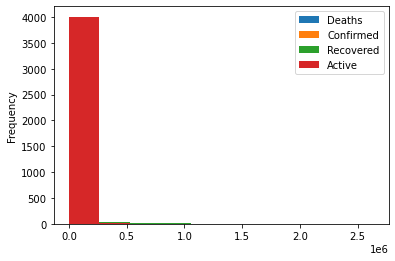

In [17]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv'
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(path)

myplot = df[['Deaths','Confirmed','Recovered','Active']]
myplot.plot(kind='hist')

### Question 6

### Plot Province/State wise Deaths in USA

In [21]:
import plotly.express as px

In [22]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [59]:
covid= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

usa = (covid['Country_Region'] == 'USA')
usa.reset_index()

,index,Country_Region
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
4001,4001,False
4002,4002,False
4003,4003,False
4004,4004,False


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio


### Question 7

### Plot Province/State Wise Active Cases in USA

### Question 8

### Plot Province/State Wise Confirmed cases in USA

### Question 9

### Plot Worldwide Confirmed Cases over time

In [24]:
import plotly.express as px
import plotly.io as pio

In [61]:
covid.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')